In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')

In [4]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [10]:
training.shape

(60000, 785)

In [11]:
import random

0.0

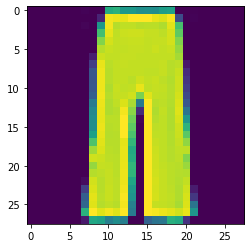

In [12]:
i = random.randint(0,60001) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1] 
label

**i** = random.randint(0,60001)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,1] 
label

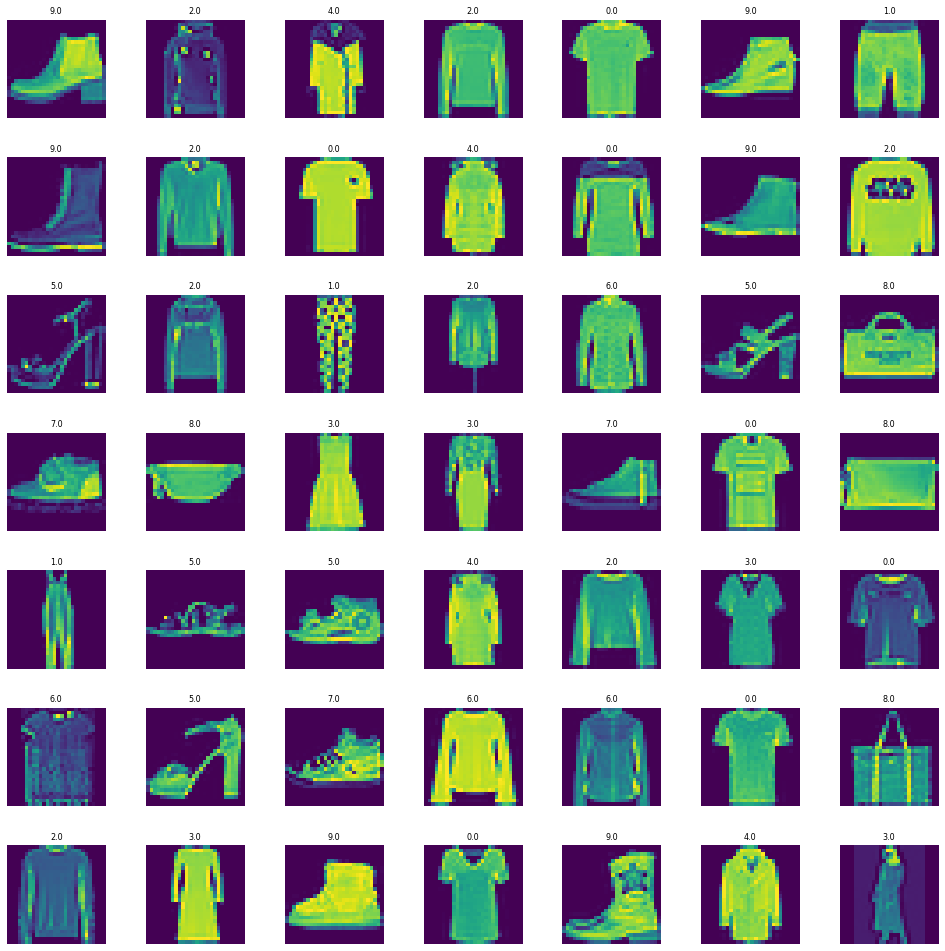

In [13]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [14]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [16]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [17]:
X_train.shape


(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])


In [22]:
epochs = 200


In [23]:

cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/200
94/94 [==============================] - 2s 11ms/step - loss: 1.4002 - accuracy: 0.5534 - val_loss: 0.7877 - val_accuracy: 0.7128
Epoch 2/200
94/94 [==============================] - 1s 10ms/step - loss: 0.6950 - accuracy: 0.7445 - val_loss: 0.6256 - val_accuracy: 0.7700
Epoch 3/200
94/94 [==============================] - 1s 9ms/step - loss: 0.5918 - accuracy: 0.7847 - val_loss: 0.5623 - val_accuracy: 0.7952
Epoch 4/200
94/94 [==============================] - 1s 9ms/step - loss: 0.5389 - accuracy: 0.8036 - val_loss: 0.5238 - val_accuracy: 0.8091
Epoch 5/200
94/94 [==============================] - 1s 9ms/step - loss: 0.5060 - accuracy: 0.8147 - val_loss: 0.4958 - val_accuracy: 0.8212
Epoch 6/200
94/94 [==============================] - 1s 9ms/step - loss: 0.4828 - accuracy: 0.8231 - val_loss: 0.4755 - val_accuracy: 0.8282
Epoch 7/200
94/94 [==============================] - 1s 9ms/step - loss: 0.4680 - accuracy: 0.8278 - val_loss: 0.4614 - val_accuracy: 0.8334
Epoch 8/200

94/94 [==============================] - 1s 10ms/step - loss: 0.3125 - accuracy: 0.8877 - val_loss: 0.3571 - val_accuracy: 0.8702
Epoch 59/200
94/94 [==============================] - 1s 10ms/step - loss: 0.3119 - accuracy: 0.8873 - val_loss: 0.3601 - val_accuracy: 0.8703
Epoch 60/200
94/94 [==============================] - 1s 10ms/step - loss: 0.3113 - accuracy: 0.8874 - val_loss: 0.3551 - val_accuracy: 0.8703
Epoch 61/200
94/94 [==============================] - 1s 10ms/step - loss: 0.3079 - accuracy: 0.8878 - val_loss: 0.3593 - val_accuracy: 0.8686
Epoch 62/200
94/94 [==============================] - 1s 10ms/step - loss: 0.3075 - accuracy: 0.8892 - val_loss: 0.3496 - val_accuracy: 0.8737
Epoch 63/200
94/94 [==============================] - 1s 10ms/step - loss: 0.3058 - accuracy: 0.8892 - val_loss: 0.3487 - val_accuracy: 0.8727
Epoch 64/200
94/94 [==============================] - 1s 10ms/step - loss: 0.3049 - accuracy: 0.8904 - val_loss: 0.3580 - val_accuracy: 0.8684
Epoch 65/200

94/94 [==============================] - 1s 11ms/step - loss: 0.2646 - accuracy: 0.9043 - val_loss: 0.3494 - val_accuracy: 0.8750
Epoch 116/200
94/94 [==============================] - 1s 10ms/step - loss: 0.2623 - accuracy: 0.9053 - val_loss: 0.3488 - val_accuracy: 0.8736
Epoch 117/200
94/94 [==============================] - 1s 10ms/step - loss: 0.2627 - accuracy: 0.9041 - val_loss: 0.3473 - val_accuracy: 0.8755
Epoch 118/200
94/94 [==============================] - 1s 10ms/step - loss: 0.2627 - accuracy: 0.9045 - val_loss: 0.3482 - val_accuracy: 0.8736
Epoch 119/200
94/94 [==============================] - 1s 10ms/step - loss: 0.2612 - accuracy: 0.9054 - val_loss: 0.3531 - val_accuracy: 0.8735
Epoch 120/200
94/94 [==============================] - 1s 10ms/step - loss: 0.2615 - accuracy: 0.9058 - val_loss: 0.3498 - val_accuracy: 0.8743
Epoch 121/200
94/94 [==============================] - 1s 10ms/step - loss: 0.2617 - accuracy: 0.9038 - val_loss: 0.3441 - val_accuracy: 0.8766
Epoch 

Epoch 172/200
94/94 [==============================] - 1s 11ms/step - loss: 0.2316 - accuracy: 0.9159 - val_loss: 0.3640 - val_accuracy: 0.8758
Epoch 173/200
94/94 [==============================] - 1s 11ms/step - loss: 0.2303 - accuracy: 0.9170 - val_loss: 0.3519 - val_accuracy: 0.8818
Epoch 174/200
94/94 [==============================] - 1s 11ms/step - loss: 0.2308 - accuracy: 0.9167 - val_loss: 0.3501 - val_accuracy: 0.8798
Epoch 175/200
94/94 [==============================] - 1s 11ms/step - loss: 0.2317 - accuracy: 0.9154 - val_loss: 0.3534 - val_accuracy: 0.8805
Epoch 176/200
94/94 [==============================] - 1s 11ms/step - loss: 0.2302 - accuracy: 0.9163 - val_loss: 0.3532 - val_accuracy: 0.8808
Epoch 177/200
94/94 [==============================] - 1s 11ms/step - loss: 0.2296 - accuracy: 0.9165 - val_loss: 0.3510 - val_accuracy: 0.8815
Epoch 178/200
94/94 [==============================] - 1s 11ms/step - loss: 0.2298 - accuracy: 0.9174 - val_loss: 0.3630 - val_accuracy:

In [24]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8805
Test Accuracy : 0.881


In [25]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)


313/313 [==============================] - 0s 988us/step


In [26]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

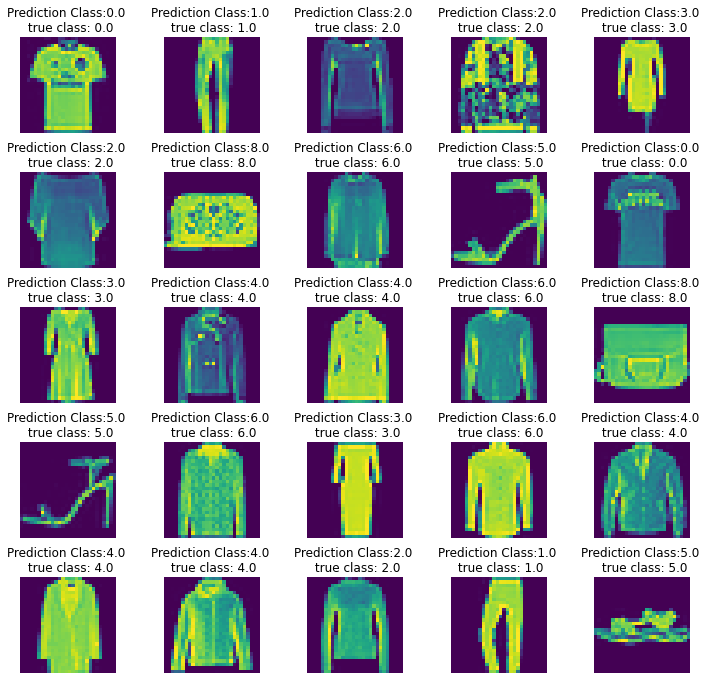

In [27]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)  

In [28]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.88      0.77      0.82      1000
     Class 1       0.97      0.98      0.98      1000
     Class 2       0.84      0.80      0.82      1000
     Class 3       0.87      0.90      0.89      1000
     Class 4       0.83      0.80      0.81      1000
     Class 5       0.96      0.96      0.96      1000
     Class 6       0.65      0.75      0.70      1000
     Class 7       0.95      0.89      0.92      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.92      0.97      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

